# Earthquakes and hydraulic fracture in Oklahoma

Harvard CS109 final project, submitted December 2015

Kamrine Poels, Eric Fredrickson, Thibaut Perol

# Abstract

Write the abstract

# Table of Contents

* [0. Introduction](#0-Introduction)
  *   [0.1 Our data](#0.1-data)
  *   [0.2 Visualization of the earthquakes](#0.2-Visualization-of-the-earthquakes)
  *   [0.3 Visualization of the disposal wells](#0.3-Visualization-of-the-disposal-wells)
  
* [1. Visual Inspection: Oklahoma State seismicity](#1.-Oklahoma-State-seismicity)
  *  [1.1 Increase of the number of earthquake events in Oklahoma](#1.1-Increase-of-the-number-of-earthquake-events-in-Oklahoma)
  * [1.2 Is the increase of earthquakes related to the increase of disposal wells](#1.2-increase-earthquakes-disposal-wells)

* [2. Local seismicity](#2.-Local-seismicity)
  *   [2.1 Oklahoma city](#2.1-Oklahoma-city) 
  *   [2.2 Prague](#2.2-Prague)

* [3. Baseline Predictions](#3. -Baseline Predictions)
    * [3.1 Number of earthquakes](#3.1-Number of earthquakes)
    * [3.2 Time of next earthquake](#3.2-Time of next earthquakes)
    * [3.3 Magnitude of earthquakes](#3.3-Magnitude of earthquakes)

* [4. Earthquakes by Location](#4. -Baseline Predictions)

* [5. Potential Predictor: Disposal Wells](#5. -Potential Predictor: Disposal Wells)
    * [5.1 Response: Number of Earthquakes](#5.1 -Response: Number of earthquakes)
    * [5.2 Response: Magnitude of Earthquakes](#5.2 -Response: Magnitude of earthquakes)


# 0. Introduction

## Background

Human-induced earthquakes is becoming an important topic in political and scientific discussions and is now vastly reported by the media. It is well known that surface and underground mining, reservoir depletion, injection and withdrawal of fluids and gas from the subsurface are capable of inducing slip on preexisting faults and potentially earthquakes of various magnitudes. Since 2009, new drilling technologies have given access to oil and gas in previously unproductive geological formations.

## Motivation

The recent increase of small to large earthquake events in central and eastern United States has fueled concern that hydraulic fracturing could be responsible for the increase of the rate of earthquake acitivity. Since 2009, the oil industry has expanded its use of the hydraulic fracturing technique because of the high price of oil that makes the extraction of unconventional oil and gas now economically viable. Microearthquakes (magnitude lower than 2 on the Ritcher magnitude scale, determined from the logarithm of the amplitude of waves recorded by seismographs) are routinely generated as part of the hydraulic fracturing process (fracking) to stimulate oil and gas reservoir. However the currently practiced protocol has low risk of inducing destructive earthquakes. Over the past **100,000 fracking wells drilled**, the **biggest earthquake recorded was of magnitude 3.6**, which is too small to pose serious safety risk.


Nevertheless, the correlation between the increase of fracking and earthquake events has drawn lots of attention from both the scientific community and the media. Ellsworth [2013] claims that some of the seismicity is associated with the increase in saltwater disposal that comes from 'flow-back' water after multistage fracturing operations (see the National Research Council report, *Induced Seismicity Potential in Energy Technologies* [2012]). Once the unconventional oil is extracted, along with the contaminated saltwater, this latter is reinjected into deeper sedimentary geological formations with high porosity and permeability via regulated class II underground injection control (UIC) wells. Sometimes the saline water is reinjected as part of water-flooding enchanced oil recovery. However the large increase of earthquake activity is thought to be associated with the disposal wells.

Since 2009, Oklahoma has been impacted by a significant increase of earthquake events. The exponential increase of the number of earhquakes affects all range of magnitude, from the smallest to the largest earthquake sizes. Furthemore, in this state, the number of saltwater disposal wells have increased dramatically. Sometimes, the sedimentary geological formation used to store the contaminated saltwater is hydraulically connected to the crystalline bedrock. The increase of pore fluid pressure on preexisting fault surfaces in crystalline rocks weakens the fault and can potentially trigger earthquakes. For example several of the largest earthquakes in United States in 2011 and 2012 have been triggered by disposal wells. The **largest was of magnitude 5.6 in Prague, central Oklahoma in 2011** and destroyed 12 homes and injured 2 people. However, only a small fraction of the **30,000 disposal wells** appears to pose safety risk issues. It becomes important to understand the processes of injection-induced seismicity.

In this project, we will examine the question: how well can be predict earthquakes in Oklahoma (the number of earthquakes, time of the next earthquake, magnitude) with the features we have at our disposal?

# 0.1 Our data

We collect some data from the Oklahoma Geological Survey on the history of earthquake events localized in Oklahoma state during the past century. From their website http://www.okgeosurvey1.gov we can access an Earthquakes catalog which gives us precious information on the data, location and magnitude of earthquakes. In order to download this catalog we write the following script. Because the catalog is very sparse for the years before the onset of modern seismic recording (1974), we only load the catalog for the years after 1980. It is claimed that the catalog is 'fairly complete to a minimum magnitude of 2.9 from 1980 to present'. 

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import json
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from pyquery import PyQuery as pq
import requests
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import random
import json
import time
import csv

# Default plotting
from matplotlib import rcParams

dark_colors = ["#99D699", "#B2B2B2",
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (12, 9)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = "white"
rcParams['axes.titlesize'] = 20      
rcParams['axes.labelsize'] = 17.5
rcParams['xtick.labelsize'] = 15 
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 17.5
rcParams['patch.edgecolor'] = 'none'
rcParams['grid.color']="gray"   
rcParams['grid.linestyle']="-" 
rcParams['grid.linewidth'] = 0.3
rcParams['grid.alpha']=1
rcParams['text.color'] = "444444"
rcParams['axes.labelcolor'] = "444444"
rcParams['ytick.color'] = "444444"
rcParams['xtick.color'] = "444444"


# Create an initial data frame by loading the earthquake
# catalog for year 1980
eq_df = pd.DataFrame()
eq_df = pd.read_csv('http://wichita.ogs.ou.edu/eq/catalog/1980/1980.csv')

# Add the additional years until 2015 included
for year in range(1981,2016):
    url = 'http://wichita.ogs.ou.edu/eq/catalog/' + str(year) + '/' + str(year) + '.csv'
    temp_df = pd.read_csv(url)
    eq_df = eq_df.append(temp_df,ignore_index = True)
# the dataframe is chronologically ordered

    
# add a column with year as a float
# e.g, 1 Jan 2015 is 2015.0 and 31 Dec 2015 is 2015.99
year_float = []
for date in eq_df.origintime.values:
    new_date = time.strptime(date[0:10], "%Y-%m-%d")
    to_add =int(float(new_date.tm_yday)/36.6*100)
    year_float.append(float(str(new_date.tm_year) + '.' + str(to_add)))
eq_df['year_float'] = year_float
    
# Drop the columns we don't want to use because it takes memory
# we do this process in place to avoid copying into an other DataFrame
# drop the error in time and location for now
# drop various other estimations of magnitude
# drop information on body waves and surface waves
eq_df.drop(['err_lon','err_lat','err_depth','err_origintime','mw','mw_src','mblg_usgs','mb','mblg_ogs',
           'ml_ogs', 'ms','mfa','max_mmi','reafile','reamtime','pdlid',
           'mw_ogs'], axis=1, inplace=True)

# Save data frame for future use
eq_df.to_csv('./tempdata/earthquakes_catalog.csv',sep = '|')

# Load the data frame
# eq_df = pd.DataFrame.from_csv('./tempdata/earthquakes_catalog.csv',sep = '|')

# Show the first 5 earthquakes in the catalog and their features
eq_df.head()

,id,origintime,latitude,longitude,depth,county,origin_src,prefmag,pmag_type,pmag_src,m3hz_ogs,md_ogs,geom,year_float
0,255,1980-01-05 07:11:31.21,35.586,-97.894,5,CANADIAN,OGS,1.9,M3Hz,OGS,1.9,1.7,0101000020E6100000F0A7C64B377958C05EBA490C02CB...,1980.130
1,256,1980-01-12 07:12:56.45,36.453,-97.642,5,GARFIELD,OGS,1.7,M3Hz,OGS,1.7,1.4,0101000020E61000000C022B87166958C0448B6CE7FB39...,1980.320
2,257,1980-02-03 00:46:30.05,33.994,-97.463,5,LOVE,OGS,2.2,M3Hz,OGS,2.2,2.0,0101000020E61000001283C0CAA15D58C0AC1C5A643BFF...,1980.920
3,258,1980-02-05 04:32:35.45,34.046,-97.451,5,LOVE,OGS,2.1,M3Hz,OGS,2.1,1.9,0101000020E6100000BE9F1A2FDD5C58C0D9CEF753E305...,1980.980
4,259,1980-03-09 03:57:10.56,35.100,-95.100,5,HASKELL,OGS,1.2,M3Hz,OGS,1.2,1.4,0101000020E61000006666666666C657C0CDCCCCCCCC8C...,1980.188


We intentionally ignore some of the data relative to body and surface waves as well as other source of estimations of the magnitude to take less space in memory. A complete description of the columns can be found here http://www.okgeosurvey1.gov/media/Catalog_Information_/OGS_Reference_Key_for_Earthquake_Catalog_Header_Categories.pdf.
The column that will be used in this study is the recommended magnitude estimation from column prefmag. Here is a description of the columns we kept.

*  id:	Internal	identification	number	assigned	by	the	OGS
*  origintime:	Estimated	date	and	time	of	the	earthquake
*  latitude:	Estimated latitudinal	coordinate	of the	earthquake epicenter
*  longitude:	Estimated Longitudinal	coordinate	of	the	earthquake epicenter
*  depth:	Calculated depth	of	the	earthquake in	kilometers
*  county:	County	within	which	the	earthquake	was	located
*  origin_src:	Source	of	reported	earthquake	location
*  prefmag:	Preferred	magnitude
*  pmag_type: Type	of	magnitude	reported
*  pmag_src: Source	of	reported	magnitude
*  m3hz_ogs: Lg	magnitude	estimate	formerly	used	by	the	OGS
*  md_ogs: Earthquake	duration	magnitude	estimated	by	the	OGS
*  geom: A	well-known	binary	(WKB)	Geographic	Information	System	GIS	format

Note that OGS stands for Oklahoma Geological Survey and USGS for United	States	Geological	Survey.

# 0.2 Visualization of the earthquakes

We created an interactive visualization tool on the website: https://tperol.github.io/cs109-finalproject/.
The first tab maps the distribution of earthquakes in Oklahoma at a given year in red overlayed on the previous earthquakes in green. One can use the slider on the upper right corner to get a sense of the increase of seismic activity during the past 6 years. ** talk about apparent clustering **


In [25]:
#REQUIRES INSTALLATION conda install basemap
#received assistance from https://peak5390.wordpress.com/2012/12/08/matplotlib-basemap-tutorial-plotting-points-on-a-simple-map/
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def plot_earthquakes(df):
    map = Basemap(llcrnrlon=int(min(df.longitude))-1, llcrnrlat=int(min(df.latitude))-1,
                  urcrnrlon=int(max(df.longitude))+1, urcrnrlat=int(max(df.latitude))+1)
    map.plot(df.longitude.values, df.latitude.values, 'ro', markersize=2)
    map.drawmapboundary(fill_color='white')
    map.drawcoastlines()
    map.drawstates()
    map.drawcounties()
    plt.plot()
    plt.show()

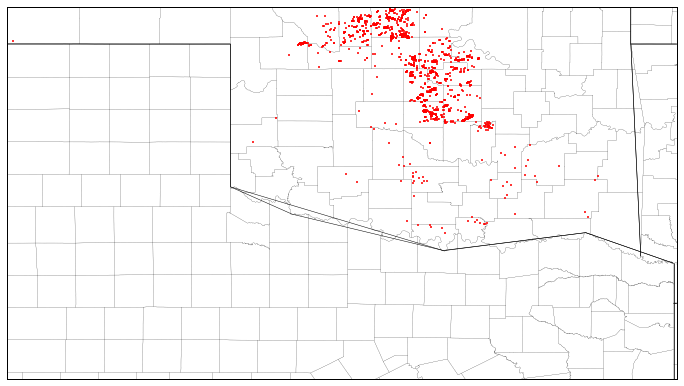

In [29]:
plot_earthquakes(eq_df[(eq_df.prefmag>=3)])

# 0.3 Visualization of the disposal wells

We download the publicly available data (http://www.occeweb.com/og/ogdatafiles2.htm) on disposal wells from the Oklahoma Corporation Commisssion with the following code.

** talk about UIC , check the data and what can we get from it **

In [4]:
with open('tempdata/2013_FracFocusReport.txt') as inputfile:
    filetemp = list(csv.reader(inputfile))
# Initiate dictionary for data
fracfocus = {}
# Get names of features
new_keys = filetemp[0][0].split("\t")
# Add names of features as keys to dictionary fracfocus. Each element is a list
for key in new_keys:
    fracfocus[key] = []
for line in filetemp[1:]:
    new_items = line[0].split('\t')
    # If data is missing, don't add observation/site to dictionary
    if len(new_items) == 15:
        for key, item in zip(new_keys, new_items):
            try:
                fracfocus[key].append(float(item))
            except:
                fracfocus[key].append(item)
# Convert to Pandas data frame
fracfocus = pd.DataFrame(fracfocus)
# Get observations in Oklahoma
fracfocus = fracfocus[fracfocus.state == 'Oklahoma']
print('Number of wells = {}, Number of features = {}'.format(fracfocus.shape[0],fracfocus.shape[1]))
fracfocus.head()

Number of wells = 852, Number of features = 15


,api,county,datum,fracture_date,latitude,longitude,operator,pdf_seqid,production_type,published,r_seqid,state,total_water_volume,true_vertical_depth,well_name
66,35-003-22379-00-00,Alfalfa,NAD27,2012-10-03,36.870004,-98.245130,SandRidge Energy,44827,Oil,2013-03-20 15:19:23.619209,41565,Oklahoma,1500114,5183,Fox 2810 3-26H
92,35-003-22495-00-00,Alfalfa,NAD27,2013-03-08,36.839823,-98.196894,SandRidge Energy,47442,Oil,2013-04-24 11:19:17.892085,44833,Oklahoma,1792182,5234,Stein Trust 2709 2-8H
99,35-003-22556-00-00,Alfalfa,NAD27,2013-03-28,36.958085,-98.356177,SandRidge Energy,48458,Oil,2013-05-03 12:19:49.346480,45710,Oklahoma,1415250,4898,Cecil 2911 4-26H
100,35-003-22511-00-00,Alfalfa,NAD27,2013-03-21,36.986320,-98.208290,SandRidge Energy,48473,Oil,2013-05-03 12:19:51.102388,45712,Oklahoma,1443942,4878,West 2909 4-18H
101,35-053-23208-00-00,Grant,NAD27,2013-03-22,36.766688,-97.796543,SandRidge Energy,48472,Oil,2013-05-03 12:20:23.493616,45741,Oklahoma,1772951,5105,Jackson 2606 3-1H


** talk about the wells on Tableau **

# 1. Oklahoma State seismicity

We begin with some basic visual inspection of the data. We first plot a histogram of the number of earthquakes by year.


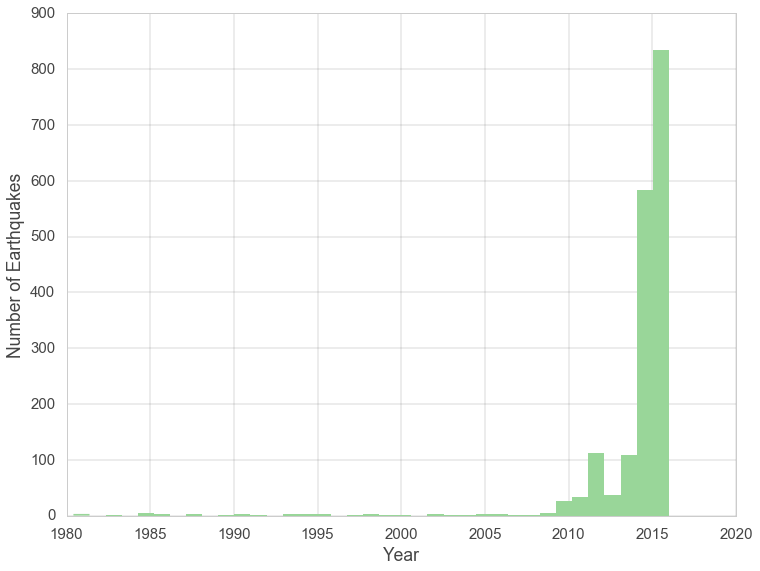

In [14]:
#plot number of earthquakes by year
mask = eq_df['prefmag'] >=3
plt.hist(eq_df[mask]['year_float'].values, bins=2016-1980+1)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')

This visual inspection suggests a clear difference in the number of earthquakes starting around 2010 and since fracking becomes more intense around the same time further makes us suspect an association between the number of earthquakes and fracking activity (specifically, based on past research, the use of disposal wells.)

We further investigate this hypothesis visually. One way of expressing our hypothesis of a difference betwen post-2010 and pre-2010 is as follows. The cumulative number of earthquakes will, of course, increase over time and it is a reasonable first guess to think that it would increase linearly. If there is a real difference between pre-2010 and post-2010, we would expect that fitting lines to the two groups of data separately would produce of lines of very different slopes.

We investigate this in the visualization below. We fit a line to the pre-2010 data and smooth the points for the post-2010 data. We continue the pre-2010 line in the background for comparison.

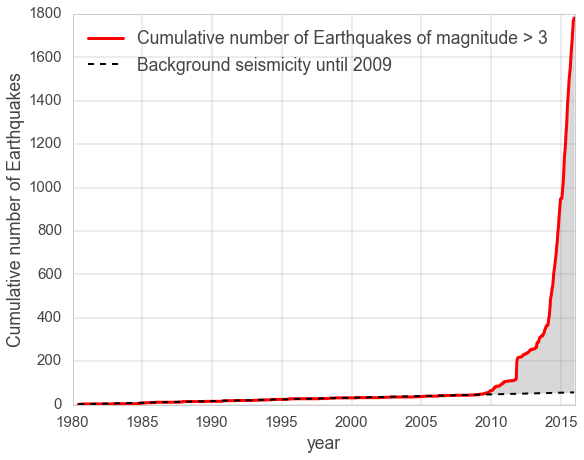

In [4]:
mask = eq_df['prefmag'] >=3
eq_count, base = np.histogram(eq_df[mask]['year_float'], bins = eq_df[mask].shape[0])
# plot the cumulative number of earthquakes of magnitude > 3
plt.figure(figsize = (9,7))
plt.plot(base[:-1], np.cumsum(eq_count), lw=3,c='r', label='Cumulative number of Earthquakes of magnitude > 3' )
mask_time = (eq_df['year_float'] < 2009) & (eq_df['prefmag'] >=3)
eq_2010, base_2010 = np.histogram(eq_df[mask_time]['year_float'], bins = eq_df[mask_time].shape[0])
# fit the earthquake count before 2009 with a 1st order polynomial
# this is the background seismicity rate
fit = np.polyfit(base_2010[:-1],np.cumsum(eq_2010),1)
fit_fn = np.poly1d(fit)
plt.plot(base[:-1],fit_fn(base[:-1]),'k--',label = 'Background seismicity until 2009')
# now fill in between
plt.fill_between(base[:-1], np.cumsum(eq_count), fit_fn(base[:-1]), color='grey', alpha = 0.3);
plt.xlim([1980,2016]);
plt.ylabel('Cumulative number of Earthquakes')
plt.xlabel('year')
plt.legend(loc =2);

The visualization indeed suggests that the line for the pre-2010 data does not fit the post-2010 data very well.

Since this is just a visual inspection, we test the hypothesis formally below.

# 2. Local seismicity

# 2.1 Oklahoma city

# 2.2 Prague

# 3. Baseline Predictions

#3.2 Time of Next Earthquake

There are reasons to believe that the number of earthquakes per year, hour, other unit of time can be approximated fairly well by a Poisson distribution, specifically that Q~Pois( $\lamba$ t) where Q is the number of earthquakes, t is some unit of time, and $\lambda$ is a rate parameter. The reasons for this as follows.

The Binomial distribution describes the total number of "successes" out of n trials with a probability of success p. The Poisson distribution arises as n goes to infinite and p goes to 0 while np remains constant. Thus, it is a good approximation when there are many, many trials, but the probability of success is quite local for any given trial. Thus, the Poisson distribution is likely a good approximation for earthquakes. For a given year, hour, etc. there is a low probability that any particular very small region in oklahoma will experience a magnitude>3 earthquake. However, there are many very small regions in Oklahoma.

It can be further shown that if Q~Pois($lamba*t$), D~Expo($\lambda) where D is the amount of time between any two successive earthquakes.

Thus, as an initial baseline, we plot the amount of time between earthquakes for the whole state of Oklahoma and see how well it can be modelled with an exponential distribution.

In [16]:
import datetime
#function to create list of interarrival times in hours from df 
def get_hours_between(df):
    dates=[]
    origintimes = df.origintime.values
    for date in origintimes:
        year, month, day = date.split('-')
        day, hour = day.split(' ')
        hour, minute, second = hour.split(':')
        if len(second.split('.'))==2:
            second, microsecond = second.split('.')
        elif len(second.split('.'))==1:
            microsecond=0
        dates.append(datetime.datetime(int(year), int(month), int(day), int(hour), int(minute), 
                                       int(second), int(microsecond)))
    dates=sorted(dates)
    deltas=[]
    for i in range(1,len(dates)):
        delta = dates[i] - dates[i-1]
        delta = delta.total_seconds()/3600
        deltas.append(delta)
    deltas = np.array(deltas)
    return deltas

In [17]:
deltas = get_hours_between(eq_df[eq_df.prefmag>=3])

In [18]:
def fit_expo(deltas, bins=100, xmax=100, ymax=0.02):
    expo_fit = sp.stats.expon.fit(deltas, floc=0)
    plt.hist(deltas, bins=bins, normed=True)
    x = np.arange(0,3000,0.01)
    y = sp.stats.expon.pdf(x, scale=expo_fit[1])
    plt.plot(x,y)
    plt.xlim([0,xmax])
    plt.ylim([0,ymax])
    return(expo_fit[1])

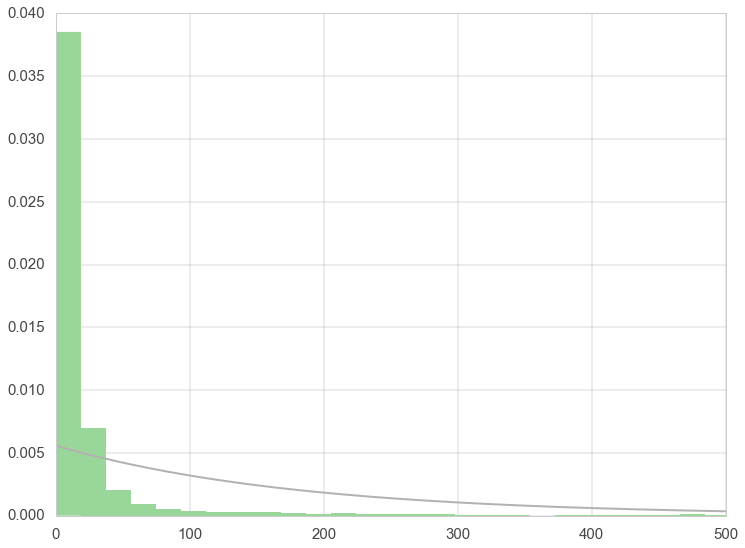

In [21]:
fit = fit_expo(deltas, bins=1000, xmax=500, ymax=0.04)

The above plot shows that the fit is not too good. The exponential curve like the histogram does decrease at an increasing rate, but overall the curve does not fit too well. We can further check the fit with a probability plot.

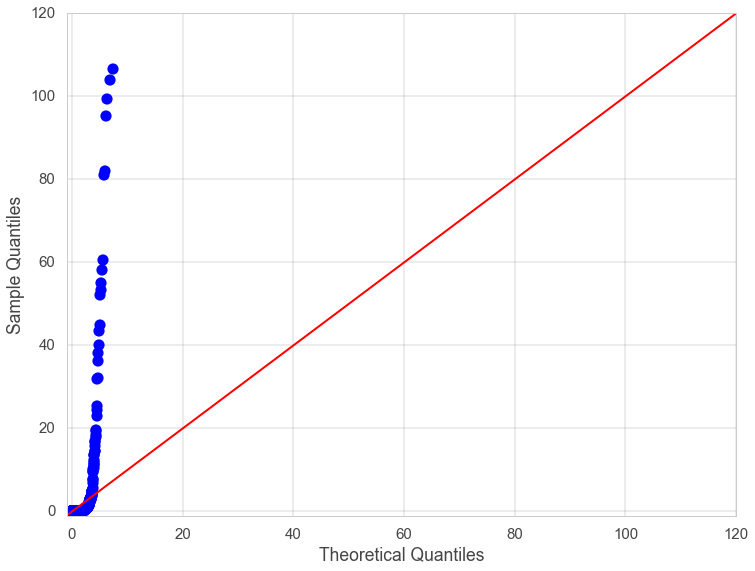

In [22]:
import statsmodels.api as sm
sm.qqplot(deltas, dist='expon', fit=True, line='45')
plt.show()

This further demonstrates that the fit is not too good. We will see if we can improve upon this fit in our analysis below.